In [1]:
# import data manimulation liabraries
import numpy as np
import pandas as pd
# import data visualization laibraries
import matplotlib.pyplot as plt
import seaborn as sns

# import filter warning liabraries
import warnings
warnings.filterwarnings('ignore')

# import logging files

import logging
logging.basicConfig(level=logging.INFO,
                   filemode='w',
                   filename='model.log',
                   format='%(asctime)s - %(levelname)s - %(message)s',force= True)

In [2]:
# Data import using pandas fuction

url= 'https://raw.githubusercontent.com/ankitmandhare1111/bankmarketing_MLModel/refs/heads/main/BankTelemarketing.csv'

df= pd.read_csv(url,sep= ';')

print(df.sample(frac=1))
df.sample(frac=1) # suffel dataset



       age          job   marital  education default  balance housing loan  \
24804   34  blue-collar   married  secondary      no      559     yes   no   
14309   60      retired   married   tertiary      no        0      no   no   
5758    29   technician    single  secondary      no     1395     yes   no   
22821   49  blue-collar   married    primary      no     -117      no   no   
29144   34   unemployed  divorced   tertiary      no      182     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
4212    49   management    single   tertiary      no      354     yes   no   
16476   39   technician   married  secondary      no      694     yes   no   
10724   45    housemaid   married    primary      no      938      no   no   
11700   46   technician    single  secondary      no     3494     yes   no   
20083   32   management   married   tertiary      no      312      no   no   

         contact  day month  duration  campaign  pdays  previou

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3033,50,admin.,divorced,secondary,yes,-500,yes,no,unknown,14,may,148,3,-1,0,unknown,no
9854,48,services,married,secondary,no,533,no,no,unknown,9,jun,63,1,-1,0,unknown,no
44582,61,retired,married,tertiary,no,5267,no,no,cellular,18,aug,212,7,188,3,success,no
7466,42,admin.,single,primary,no,629,yes,no,unknown,29,may,164,3,-1,0,unknown,no
10823,45,retired,divorced,secondary,no,1735,no,yes,unknown,17,jun,306,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34393,32,management,single,tertiary,no,2613,no,no,cellular,4,may,520,2,-1,0,unknown,no
12549,35,services,married,secondary,no,1659,yes,no,unknown,3,jul,197,1,-1,0,unknown,no
16219,56,technician,married,secondary,no,205,no,yes,cellular,23,jul,442,2,-1,0,unknown,no
36944,39,blue-collar,single,secondary,no,631,yes,no,cellular,12,may,57,2,344,8,other,no


In [3]:
logging.info('Dataset uploded successfull')

In [4]:
logging.info('Dataset uploded successfull2')

In [5]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


((45211, 17), None)

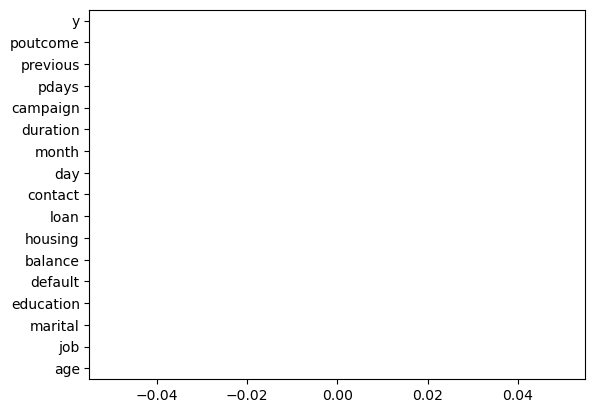

In [6]:
# as the categorical column not showing any specific order so lable encoding technique is recomended is recommended


df.isnull().sum().plot(kind='barh')
plt.show()

In [7]:
#cheking output i.e target column for the data distribution
df['y'].value_counts()


y
no     39922
yes     5289
Name: count, dtype: int64

In [8]:
#encoding target colunm

df['y']= df['y'].replace({'no':0,'yes':1})

In [9]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [10]:
df['default']= df['default'].replace({'no':0,'yes':1})

In [11]:
df.default.value_counts()

default
0    44396
1      815
Name: count, dtype: int64

In [12]:
# when we want 

In [13]:
#encoding housing column

df['housing']= df['housing'].replace({'no':0,'yes':1})


In [14]:
#encoding loan column

df['loan']= df['loan'].replace({'no':0,'yes':1})


In [15]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [16]:

Numerical_Data=df.select_dtypes(exclude='object')

Categorical_Data=df.select_dtypes(include='object')

In [17]:
# Checking the Numerical_Data
Numerical_Data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1
45209,57,0,668,0,0,17,508,4,-1,0,0


In [18]:
#checking Categorical_Data
Categorical_Data

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown
...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,nov,unknown
45207,retired,divorced,primary,cellular,nov,unknown
45208,retired,married,secondary,cellular,nov,success
45209,blue-collar,married,secondary,telephone,nov,unknown


In [19]:
#checking descriptive stats: Numerical_Data and Categorical_Data

from collections import OrderedDict
stats=[]

for i in Numerical_Data:
    Numerical_Stats=OrderedDict({
                    'Feature':i,
                    'Maximum':Numerical_Data[i].max(),
                    'Minimum':Numerical_Data[i].min(),
                    'Median':Numerical_Data[i].median(),
                    '25%':Numerical_Data[i].quantile(0.25),
                    '75%':Numerical_Data[i].quantile(0.75),
                    'Mean':Numerical_Data[i].mean(),
                    'Standard_Deviation':Numerical_Data[i].std(),
                    'kurtosis':Numerical_Data[i].kurt(),
                    'Skewdness':Numerical_Data[i].skew()



    })
    stats.append(Numerical_Stats)

    report=pd.DataFrame(stats)


In [20]:
logging.info('The Above dataset is non-normally distributed')

In [21]:
# Checking Categorical_Data

for i in Categorical_Data:
    print(Categorical_Data[i].value_counts())
    print('*'*40)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
****************************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
****************************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
****************************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
****************************************
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
****************************************
poutcome
unknown    36

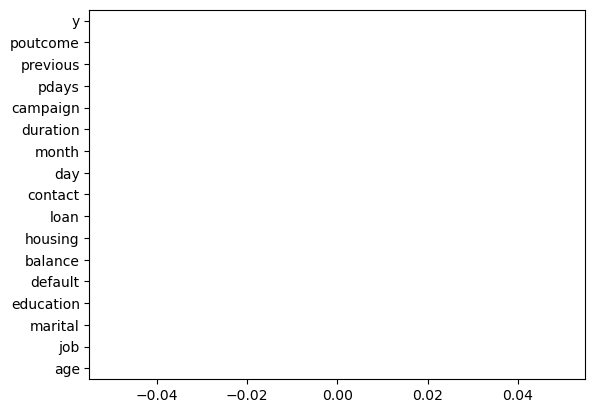

In [22]:
#checking missing info if any

df.isnull().sum().plot(kind='barh')
plt.show()

In [23]:
# using the lable incoding technique

from sklearn.preprocessing import LabelEncoder


In [24]:
df['job']=LabelEncoder().fit_transform(df['job'])
df['marital']=LabelEncoder().fit_transform(df['marital'])
df['education']=LabelEncoder().fit_transform(df['education'])
df['contact']=LabelEncoder().fit_transform(df['contact'])
df['poutcome']=LabelEncoder().fit_transform(df['poutcome'])

In [25]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0


In [26]:
Categorical_Data

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown
...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,nov,unknown
45207,retired,divorced,primary,cellular,nov,unknown
45208,retired,married,secondary,cellular,nov,success
45209,blue-collar,married,secondary,telephone,nov,unknown


In [27]:
le = LabelEncoder()
for i in Categorical_Data:
    df[i]= le.fit_transform(df[i])

In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [29]:
# target column shows imbalance dataset
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

What is datalekage ?? how to privent data leakege... interwview question

In [30]:
# balancing th etarget column using the SMOTE  technique

#step 1: divide dataset into x and y 

# X : independent column and y : Target column

X = df.drop(columns = 'y') # independet columns : 16

y = df['y']                # Target column : 1

# step 2 : split the dataset into train and test

# 100 % -----> 70% data is (seen data) used for trainning and 30% data is (unseen data) used for testing



from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.70,random_state=7)

X_train




# step 3 normalization / scaling technique

# STANDERD SCALER---> when dataset is normaly distributed
# minmax scaler----> 
#robust sclaer----->

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# step 4 : using smote technique to balance target column



X_train
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)



# step 5 : after balancing the terget column for binary classification model use logistic regression
'''
1.TP--TRUE POSITIVE
2.TN--TRUE NEGATIVE
3.FP--FALSE POSITIVE
4.FN--FALSE NEGATIVE


accuracy = (TP+TN)/(TP + TN+FP+FN)

precision = (TP)/(TP+FP)----->PPV

Recall = (TP)/(TP+FP) ----> SECnsitivity / TPR

f1 score = 2 * ((precision* recall)/ (Precision+ recall))


'''
# Import Model Preprocessing Library From SKlearn

from sklearn.linear_model import LogisticRegression

# Implement Logistic Regression to our Binary Classified Model

LR=LogisticRegression()

# Fit the Model on Training Dataset

LR.fit(X_train,y_train)

# Predict The Value Based On Test Dataset

y_pred=LR.predict(X_test)

# Step 6: Use Metrics To Evauate Model Performance
from sklearn.metrics import accuracy_score,classification_report

accuracy_score_LR=accuracy_score(y_test,y_pred)
accuracy_score_LR


  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


0.8124447065762312

In [31]:
X_train

array([[2.72727273e-01, 3.63636364e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.37662338e-01, 3.63636364e-01, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.63636364e-01, 0.00000000e+00, 0.00000000e+00, ...,
        4.24311927e-01, 7.27272727e-03, 6.66666667e-01],
       ...,
       [1.71181311e-01, 7.71332544e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.48068069e-01, 8.18181818e-01, 0.00000000e+00, ...,
        2.61542215e-02, 9.11347898e-04, 9.58229888e-01],
       [6.07477969e-01, 5.08357686e-01, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

<Axes: ylabel='marital'>

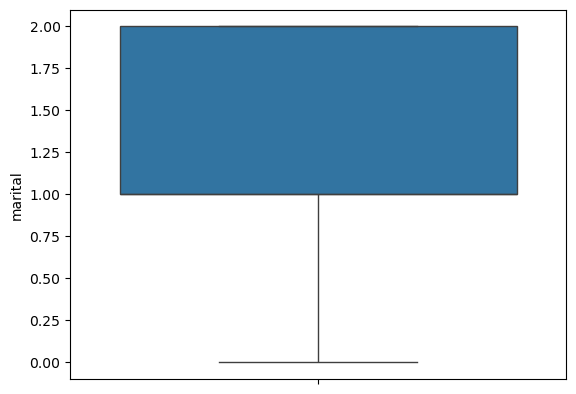

In [32]:
sns.boxplot(df['marital'])

<Axes: ylabel='balance'>

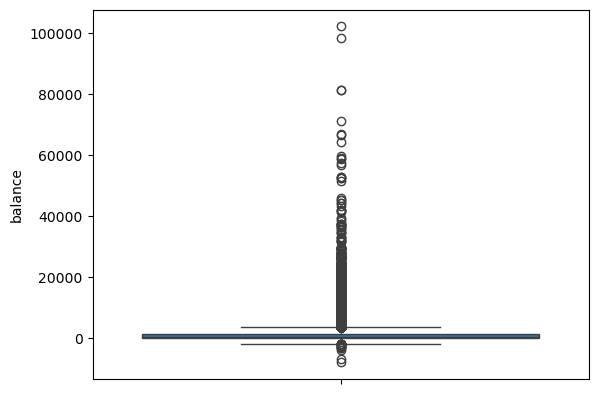

In [33]:
sns.boxplot(df['balance'])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89     12030
           1       0.35      0.80      0.49      1534

    accuracy                           0.81     13564
   macro avg       0.66      0.80      0.69     13564
weighted avg       0.90      0.81      0.84     13564



<Axes: ylabel='marital'>

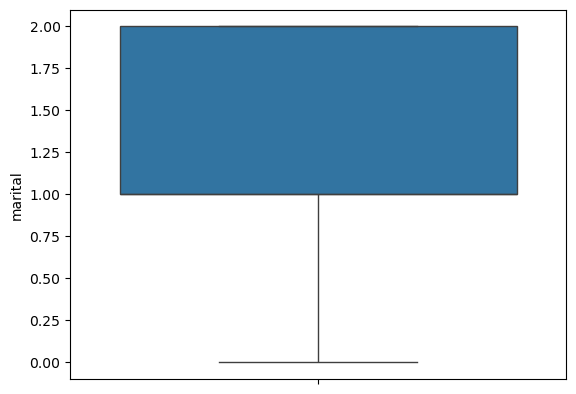

In [35]:
sns.boxplot(df['marital'])

In [37]:
X_train.min(),X_train.max()

(0.0, 1.0)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89     12030
           1       0.35      0.80      0.49      1534

    accuracy                           0.81     13564
   macro avg       0.66      0.80      0.69     13564
weighted avg       0.90      0.81      0.84     13564



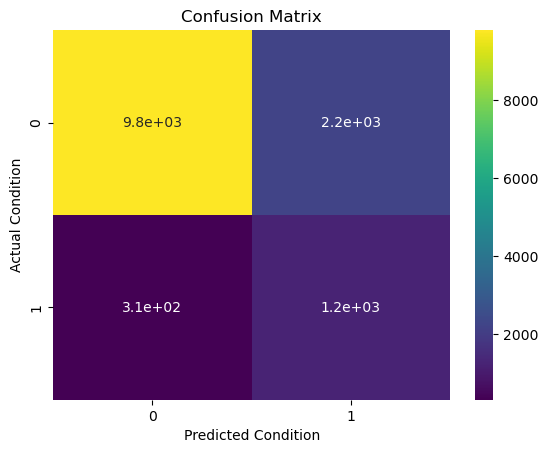

In [39]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Condition')
plt.ylabel('Actual Condition')
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_predict_RF = RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test,y_predict_RF)

accuracy_score_RF

0.8956060159245061

In [41]:
# Classification Report for Random Forest Model

print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12030
           1       0.53      0.64      0.58      1534

    accuracy                           0.90     13564
   macro avg       0.74      0.78      0.76     13564
weighted avg       0.91      0.90      0.90     13564



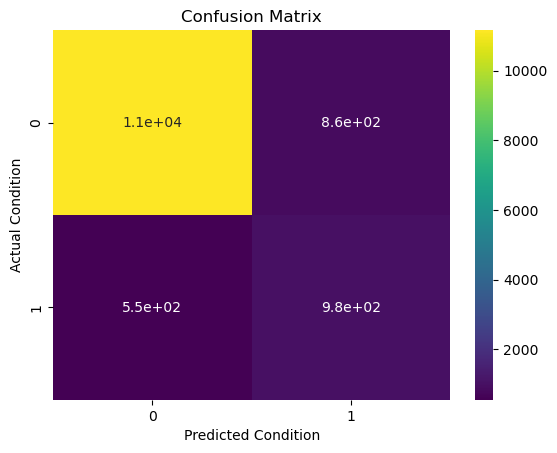

In [42]:
# Confusiom Matrix for Random Forest Classification Model

sns.heatmap(confusion_matrix(y_test,y_predict_RF),cmap='viridis',annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Condition')
plt.ylabel('Actual Condition')
plt.show()